In [1]:
#import the libaries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model

In [2]:
#import the dataset
df = pd.read_csv("diabetes.csv")

In [3]:
df.shape

(768, 9)

In [4]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.isnull().sum().sum()

0

In [6]:
num_missing = (df[df.columns] == 0).sum()

print(num_missing)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [7]:
df2=df.copy()

In [8]:
df2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
colum=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']

In [10]:
for cols in colum:
    df2[cols].replace(0,np.nan, inplace=True)

In [11]:
df2.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [12]:
df2.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
df2.isnull().sum().sum()

652

In [14]:
glucose_mean=df2['Glucose'].mean()
BloodPressure_mean=df2['BloodPressure'].mean()
SkinThickness_mean=df2['SkinThickness'].mean()
Insulin_mean=df2['Insulin'].mean()
BMI_mean=df2['BMI'].mean()

In [15]:
Insulin_mean

155.5482233502538

In [16]:
BloodPressure_mean

72.40518417462484

In [17]:
SkinThickness_mean

29.153419593345657

In [18]:
glucose_mean

121.6867627785059

In [19]:
BMI_mean

32.45746367239099

In [20]:
df2['Glucose'].fillna(glucose_mean,inplace=True)

In [21]:
df2['BloodPressure'].fillna(BloodPressure_mean,inplace=True)

In [22]:
df2['SkinThickness'].fillna(SkinThickness_mean,inplace=True)

In [23]:
df2['Insulin'].fillna(Insulin_mean,inplace=True)

In [24]:
df2['BMI'].fillna(BMI_mean,inplace=True)

In [25]:
df2.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


In [26]:
#df2.iloc[:,2:3]

In [27]:
df2.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


In [28]:
num_missing = (df2[df2.columns] == 0).sum()
print(num_missing)

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [29]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
df2.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


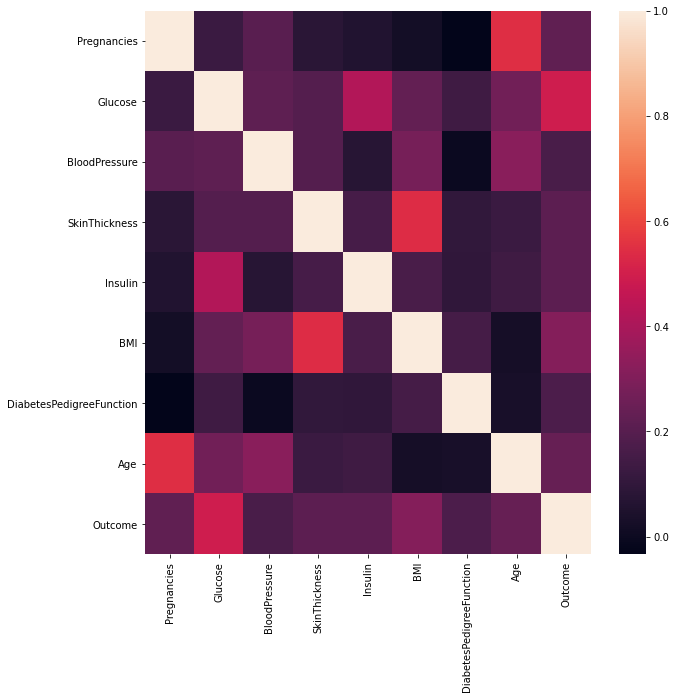

In [31]:
plt.figure(figsize=(10,10))
cor = df2.corr()
sns.heatmap(cor)
plt.show()

In [32]:
df2.isnull().sum().sum()

0

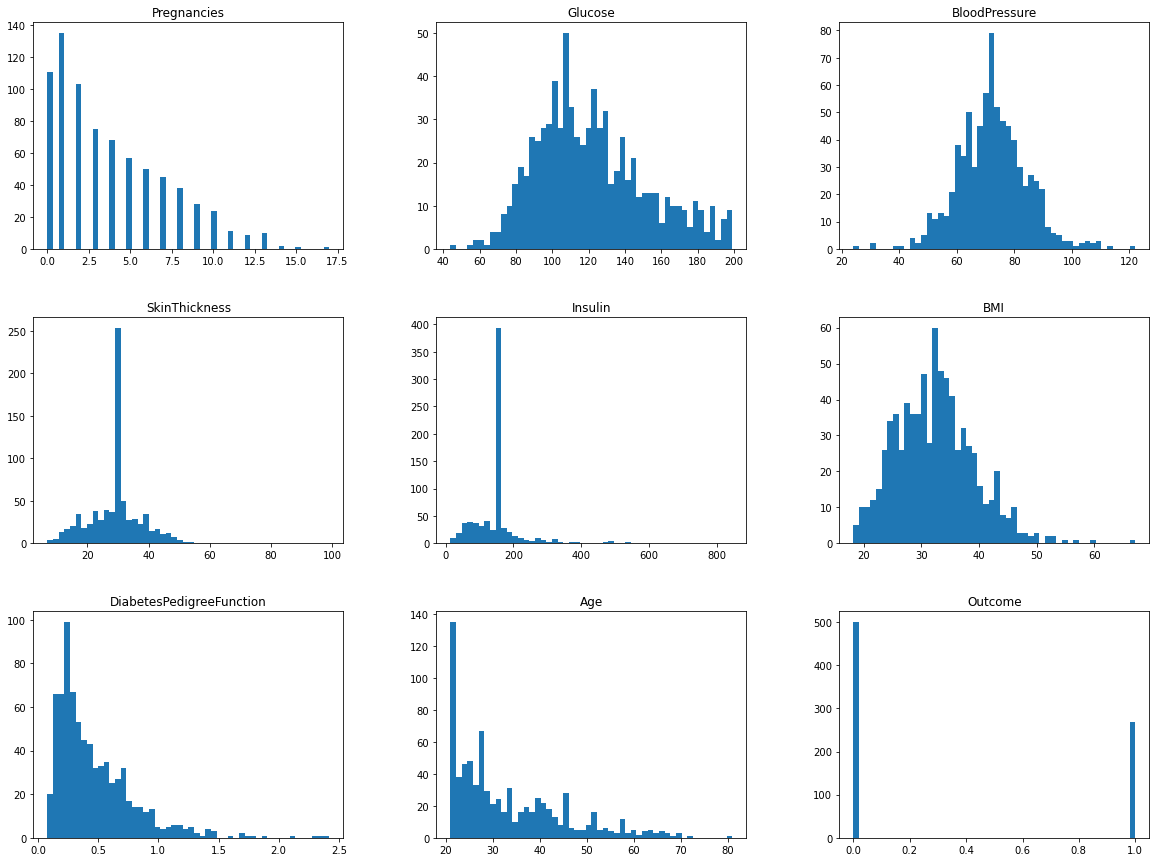

In [33]:
df2.hist(bins=50,grid=False,figsize=(20,15));

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


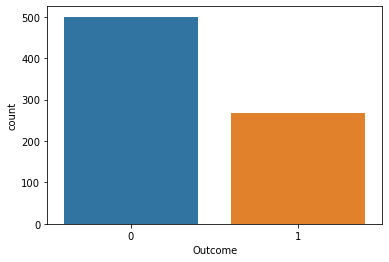

In [34]:
sns.countplot('Outcome', data=df2);

In [35]:
df2['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [36]:
df2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [37]:
x=df2.iloc[:,:-1]

In [38]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [39]:
y=df2.iloc[:,-1]

In [40]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# standardization

In [41]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()

In [42]:
x_stand = standard.fit_transform(x) 

# spliting .30

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
xtrain,xtest,ytrain,ytest = train_test_split(x_stand,y,test_size=.3,random_state=1)

In [45]:
xtest

array([[ 0.93691372,  0.47058053,  0.13192869, ..., -0.93985886,
         0.52889435,  1.51108316],
       [-0.84488505,  0.96373996, -1.02619983, ..., -0.92530424,
        -0.88452119, -0.95646168],
       [ 0.63994726, -0.41710645, -1.02619983, ..., -1.08540499,
        -0.80297799, -0.53102292],
       ...,
       [-0.84488505, -1.00889776, -1.52254062, ..., -1.05629576,
        -0.71841466, -0.87137393],
       [ 1.82781311,  1.52265398,  0.13192869, ...,  0.80669472,
         0.1966813 ,  0.06459135],
       [ 1.53084665, -0.31847456,  0.79371642, ...,  0.25361942,
        -0.63989158,  0.23476686]])

In [46]:
ytest

285    0
101    0
581    0
352    0
726    0
      ..
241    0
599    0
650    0
11     1
214    1
Name: Outcome, Length: 231, dtype: int64

# Linear regression

In [47]:
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()

In [48]:
regr.fit(xtrain,ytrain)

LinearRegression()

In [49]:
regr.score(xtest,ytest)

0.3852848819568656

In [50]:
from sklearn.metrics import accuracy_score
predict = regr.predict(xtest)
accuracy_score(ytest,predict.round())

0.7748917748917749

In [51]:
accuracy = accuracy_score(ytest,predict.round())
lin30_accuracy = accuracy*100
lin30_accuracy

77.48917748917748

In [52]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(ytest,predict.round())
conf_mat

array([[131,  15],
       [ 37,  48]], dtype=int64)

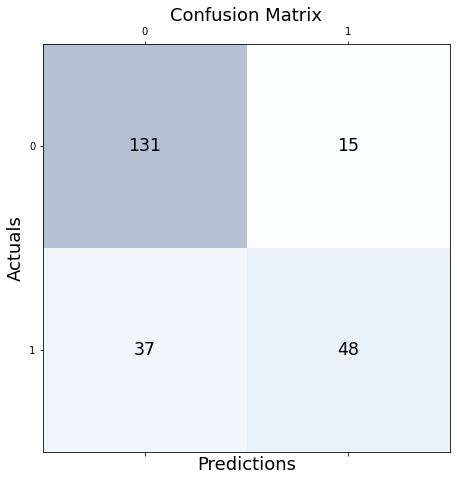

In [53]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i,s=conf_mat[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [54]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predict.round()))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       146
           1       0.76      0.56      0.65        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



# logistic regression

In [55]:
from sklearn.linear_model import LogisticRegression 
reg = LogisticRegression()

In [56]:
reg.fit(xtrain,ytrain)

LogisticRegression()

In [57]:
predict = reg.predict(xtest)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [58]:
reg.score(xtest,ytest)

0.7792207792207793

In [59]:
reg_accuracy = accuracy_score(ytest,predict)
lr_30_accuracy = reg_accuracy*100
lr_30_accuracy

77.92207792207793

In [60]:
conf_mat = confusion_matrix(ytest,predict)
conf_mat

array([[131,  15],
       [ 36,  49]], dtype=int64)

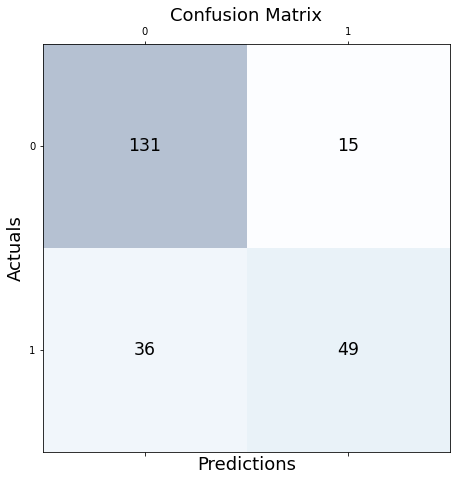

In [61]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i,s=conf_mat[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [62]:
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.77      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231



# svm

In [63]:
from sklearn.svm import SVC

In [64]:
model = SVC()
model.fit(xtrain,ytrain)

SVC()

In [65]:
predict = model.predict(xtest)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [66]:
model.score(xtest,ytest)

0.7835497835497836

In [67]:
model_accuracy = accuracy_score(ytest,predict)
s30_accuracy = model_accuracy*100
s30_accuracy

78.35497835497836

In [68]:
predict = model.predict(xtest)

In [69]:
conf_mat = confusion_matrix(ytest,predict)

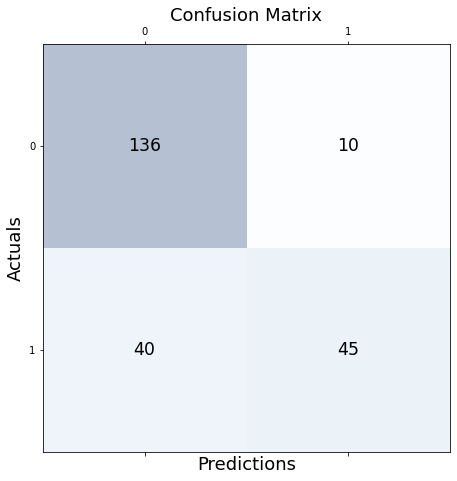

In [70]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i,s=conf_mat[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [71]:
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       146
           1       0.82      0.53      0.64        85

    accuracy                           0.78       231
   macro avg       0.80      0.73      0.74       231
weighted avg       0.79      0.78      0.77       231



# naive bayes

In [72]:
from sklearn.naive_bayes import MultinomialNB
reg = MultinomialNB()

In [73]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .30,random_state = 1)
reg.fit(xtrain,ytrain)

MultinomialNB()

In [74]:
predict = reg.predict(xtest)
predict

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [75]:
reg.score(xtest,ytest)

0.6753246753246753

In [76]:
accuracy = accuracy_score(ytest,predict)
n30_accuracy  = accuracy*100
n30_accuracy

67.53246753246754

In [77]:
reg_conf = confusion_matrix(ytest,predict)
reg_conf

array([[120,  26],
       [ 49,  36]], dtype=int64)

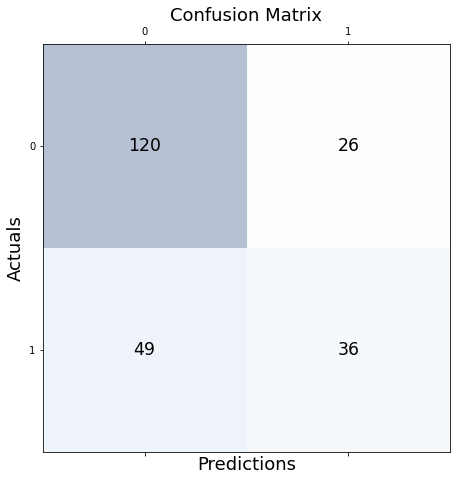

In [78]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(reg_conf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(reg_conf.shape[0]):
    for j in range(reg_conf.shape[1]):
        ax.text(x=j, y=i,s=reg_conf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [79]:
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       146
           1       0.58      0.42      0.49        85

    accuracy                           0.68       231
   macro avg       0.65      0.62      0.63       231
weighted avg       0.66      0.68      0.66       231



# random forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
Rclf = RandomForestClassifier()

In [82]:
Rclf.fit(xtrain,ytrain)

RandomForestClassifier()

# Accuray check

In [83]:
Rclf.score(xtest,ytest)

0.7792207792207793

In [84]:
predict = Rclf.predict(xtest)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [85]:
accuracy = accuracy_score(ytest,predict)

In [86]:
rfcl30_accuracy  = accuracy*100
rfcl30_accuracy

77.92207792207793

In [87]:
reg_conf = confusion_matrix(ytest,predict)
reg_conf

array([[130,  16],
       [ 35,  50]], dtype=int64)

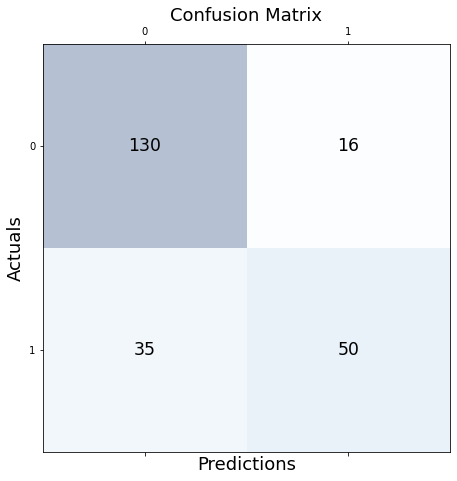

In [88]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(reg_conf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(reg_conf.shape[0]):
    for j in range(reg_conf.shape[1]):
        ax.text(x=j, y=i,s=reg_conf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [89]:
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       146
           1       0.76      0.59      0.66        85

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231



# Decision tree classifier 

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
dt  = DecisionTreeClassifier()

In [92]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

# Accuracy check

In [93]:
predict = dt.predict(xtest)
predict

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [94]:
dt.score(xtest,ytest)

0.7229437229437229

In [95]:
accuracy = accuracy_score(ytest,predict)
dt30_accuracy = accuracy*100
dt30_accuracy

72.2943722943723

In [96]:
conf_mat = confusion_matrix(ytest,predict)
conf_mat

array([[115,  31],
       [ 33,  52]], dtype=int64)

# KNN

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

In [98]:
knn_classifier.fit(xtrain,ytrain)
knn_classifier.score(xtest,ytest)

0.7575757575757576

In [99]:
predict = knn_classifier.predict(xtest)
predict

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [100]:
accuracy = accuracy_score(ytest,predict)
knn30_accuracy = accuracy*100
knn30_accuracy

75.75757575757575

In [101]:
conf_mat = confusion_matrix(ytest,predict)
conf_mat

array([[124,  22],
       [ 34,  51]], dtype=int64)

# Comparision

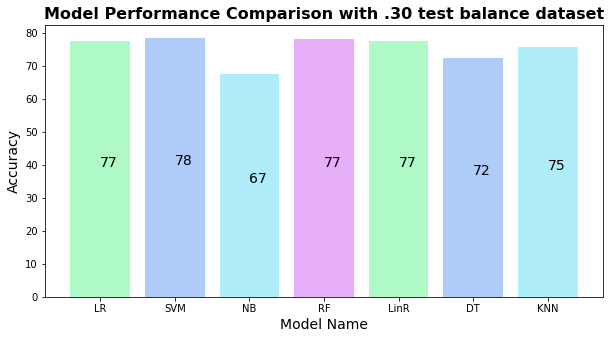

In [102]:
accuracy1 = [lin30_accuracy, s30_accuracy,n30_accuracy,rfcl30_accuracy,lin30_accuracy,dt30_accuracy,knn30_accuracy]
model_names = ['LR', 'SVM','NB','RF','LinR','DT','KNN']

total_bar = np.arange(len(model_names))
color = ['#95f7b5', '#95bcf7', '#95e9f7','#df95f7']

fig, ax = plt.subplots(figsize=(10, 5))
bar = plt.bar(model_names, accuracy1, align='center', alpha=.75, color=color)

plt.ylabel('Accuracy',fontsize=14, color='black')
plt.xlabel('Model Name',fontsize=14, color='black')
plt.title('Model Performance Comparison with .30 test balance dataset', fontsize=16, color='black', fontweight='bold')

# # this functions will set data lebel 
def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()

# split .40

In [103]:
x1train,x1test,y1train,y1test = train_test_split(x_stand,y,test_size=.4,random_state=1)

# linear Regression

In [104]:
regr.fit(x1train,y1train)

LinearRegression()

In [105]:
predict = regr.predict(x1test)
accuracy_score(y1test,predict.round())

0.7532467532467533

In [106]:
accuracy = accuracy_score(y1test,predict.round())
lin40_accuracy = accuracy*100
lin40_accuracy

75.32467532467533

In [107]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y1test,predict.round())
conf_mat

array([[173,  26],
       [ 50,  59]], dtype=int64)

In [108]:
print(classification_report(y1test,predict.round()))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       199
           1       0.69      0.54      0.61       109

    accuracy                           0.75       308
   macro avg       0.73      0.71      0.71       308
weighted avg       0.75      0.75      0.75       308



# logistic regression

In [109]:
l_reg = LogisticRegression()
l_reg.fit(x1train,y1train)

LogisticRegression()

In [110]:
predict = l_reg.predict(x1test)
accuracy_score(y1test,predict.round())

0.7564935064935064

In [111]:
accuracy = accuracy_score(y1test,predict.round())
lr40_accuracy = accuracy*100
lr40_accuracy

75.64935064935064

In [112]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y1test,predict.round())
conf_mat

array([[174,  25],
       [ 50,  59]], dtype=int64)

In [113]:
print(classification_report(y1test,predict.round()))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       199
           1       0.70      0.54      0.61       109

    accuracy                           0.76       308
   macro avg       0.74      0.71      0.72       308
weighted avg       0.75      0.76      0.75       308



# svm

In [114]:
model.fit(x1train,y1train)

SVC()

In [115]:
predict = model.predict(x1test)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,

In [116]:
model.score(x1test,y1test)

0.7597402597402597

In [117]:
model_accuracy = accuracy_score(y1test,predict)
s40_accuracy = model_accuracy*100
s40_accuracy

75.97402597402598

In [118]:
conf_mat = confusion_matrix(y1test,predict)
conf_mat

array([[179,  20],
       [ 54,  55]], dtype=int64)

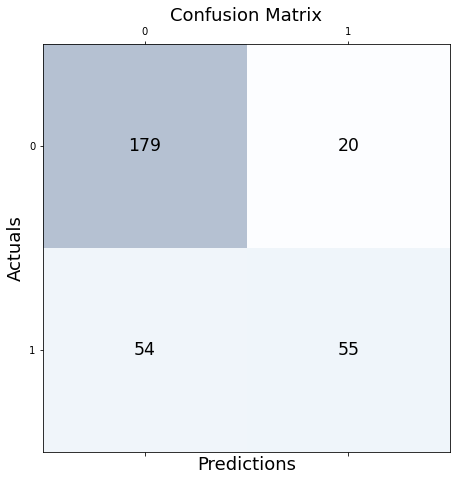

In [119]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i,s=conf_mat[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [120]:
print(classification_report(y1test,predict))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       199
           1       0.73      0.50      0.60       109

    accuracy                           0.76       308
   macro avg       0.75      0.70      0.71       308
weighted avg       0.76      0.76      0.75       308



# naive bayes

In [121]:
x1train,x1test,y1train,y1test = train_test_split(x,y,test_size = .40,random_state = 1)
reg.fit(x1train,y1train)

MultinomialNB()

In [122]:
predict = reg.predict(x1test)
predict

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,

In [123]:
accuracy = accuracy_score(y1test,predict)
n40_accuracy  = accuracy*100
n40_accuracy

61.038961038961034

In [124]:
reg_conf = confusion_matrix(y1test,predict)
reg_conf

array([[151,  48],
       [ 72,  37]], dtype=int64)

In [125]:
print(classification_report(y1test,predict))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72       199
           1       0.44      0.34      0.38       109

    accuracy                           0.61       308
   macro avg       0.56      0.55      0.55       308
weighted avg       0.59      0.61      0.60       308



# Randdom forest

In [126]:
x1train,x1test,y1train,y1test = train_test_split(x,y,test_size = .40,random_state = 1)
Rclf.fit(x1train,y1train)

RandomForestClassifier()

In [127]:
Rclf.score(x1test,y1test)

0.775974025974026

In [128]:
predict = Rclf.predict(x1test)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,

In [129]:
accuracy = accuracy_score(y1test,predict)

In [130]:
rfcl40_accuracy  = accuracy*100
rfcl40_accuracy

77.59740259740259

In [131]:
reg_conf = confusion_matrix(y1test,predict)
reg_conf

array([[175,  24],
       [ 45,  64]], dtype=int64)

In [132]:
print(classification_report(y1test,predict))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       199
           1       0.73      0.59      0.65       109

    accuracy                           0.78       308
   macro avg       0.76      0.73      0.74       308
weighted avg       0.77      0.78      0.77       308



# Decission Tree

In [133]:
dt.fit(x1train,y1train)

DecisionTreeClassifier()

In [134]:
predict = dt.predict(x1test)
predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,

In [135]:
dt.score(x1test,y1test)

0.7175324675324676

In [136]:
accuracy = accuracy_score(y1test,predict)
dt40_accuracy = accuracy*100
dt40_accuracy

71.75324675324676

In [137]:
conf_mat = confusion_matrix(y1test,predict)
conf_mat

array([[164,  35],
       [ 52,  57]], dtype=int64)

# KNN

In [138]:
knn_classifier.fit(x1train,y1train)
knn_classifier.score(x1test,y1test)

0.7142857142857143

In [139]:
predict = knn_classifier.predict(x1test)
predict

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,

In [140]:
accuracy = accuracy_score(y1test,predict)
knn40_accuracy = accuracy*100
knn40_accuracy

71.42857142857143

In [141]:
conf_mat = confusion_matrix(y1test,predict)
conf_mat

array([[161,  38],
       [ 50,  59]], dtype=int64)

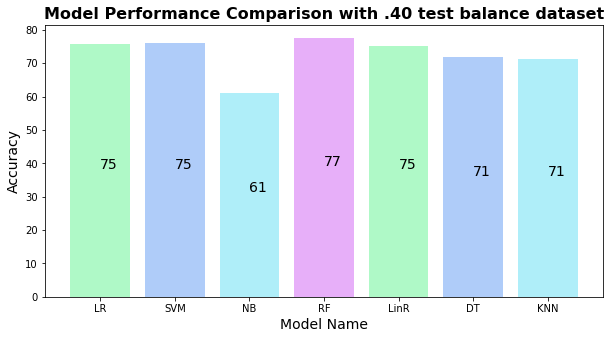

In [142]:
accuracy1 = [lr40_accuracy, s40_accuracy,n40_accuracy,rfcl40_accuracy,lin40_accuracy,dt40_accuracy,knn40_accuracy]
model_names = ['LR', 'SVM','NB','RF','LinR','DT','KNN']

total_bar = np.arange(len(model_names))
color = ['#95f7b5', '#95bcf7', '#95e9f7','#df95f7']

fig, ax = plt.subplots(figsize=(10, 5))
bar = plt.bar(model_names, accuracy1, align='center', alpha=.75, color=color)

plt.ylabel('Accuracy',fontsize=14, color='black')
plt.xlabel('Model Name',fontsize=14, color='black')
plt.title('Model Performance Comparison with .40 test balance dataset', fontsize=16, color='black', fontweight='bold')

# # this functions will set data lebel 
def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()

# Split .20

In [143]:
x2train,x2test,y2train,y2test = train_test_split(x_stand,y,test_size=.20,random_state=1)

# linear regression

In [144]:
regr.fit(x2train,y2train)

LinearRegression()

In [145]:
predict = regr.predict(x2test)
accuracy_score(y2test,predict.round())

0.7662337662337663

In [146]:
accuracy = accuracy_score(y2test,predict.round())
lin20_accuracy = accuracy*100
lin20_accuracy

76.62337662337663

In [147]:
conf_mat = confusion_matrix(y2test,predict.round())
conf_mat

array([[88, 11],
       [25, 30]], dtype=int64)

In [148]:
print(classification_report(y2test,predict.round()))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        99
           1       0.73      0.55      0.62        55

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



# logistic regression

In [149]:
l_reg.fit(x2train,y2train)

LogisticRegression()

In [150]:
predict = l_reg.predict(x2test)
accuracy_score(y2test,predict.round())

0.7727272727272727

In [151]:
accuracy = accuracy_score(y2test,predict.round())
lr20_accuracy = accuracy*100
lr20_accuracy

77.27272727272727

In [152]:
conf_mat = confusion_matrix(y2test,predict.round())
conf_mat

array([[88, 11],
       [24, 31]], dtype=int64)

In [153]:
print(classification_report(y2test,predict.round()))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83        99
           1       0.74      0.56      0.64        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.76       154



# svm

In [154]:
model.fit(x2train,y2train)

SVC()

In [155]:
predict = model.predict(x2test)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [156]:
model.score(x2test,y2test)

0.7792207792207793

In [157]:
model_accuracy = accuracy_score(y2test,predict)
s20_accuracy = model_accuracy*100
s20_accuracy

77.92207792207793

In [158]:
conf_mat = confusion_matrix(y2test,predict)
conf_mat

array([[92,  7],
       [27, 28]], dtype=int64)

In [159]:
print(classification_report(y2test,predict))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84        99
           1       0.80      0.51      0.62        55

    accuracy                           0.78       154
   macro avg       0.79      0.72      0.73       154
weighted avg       0.78      0.78      0.76       154



# Naive bayes

In [160]:
x2train,x2test,y2train,y2test = train_test_split(x,y,test_size = .20,random_state = 1)
reg.fit(x2train,y2train)

MultinomialNB()

In [161]:
predict = reg.predict(x2test)
predict

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [162]:
accuracy = accuracy_score(y2test,predict)
n20_accuracy  = accuracy*100
n20_accuracy

63.63636363636363

In [163]:
reg_conf = confusion_matrix(y2test,predict)
reg_conf

array([[79, 20],
       [36, 19]], dtype=int64)

In [164]:
print(classification_report(y2test,predict))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74        99
           1       0.49      0.35      0.40        55

    accuracy                           0.64       154
   macro avg       0.59      0.57      0.57       154
weighted avg       0.62      0.64      0.62       154



# Random forest

In [165]:
x2train,x2test,y2train,y2test = train_test_split(x,y,test_size = .20,random_state = 1)
Rclf.fit(x2train,y2train)

RandomForestClassifier()

In [166]:
Rclf.score(x2test,y2test)

0.8051948051948052

In [167]:
predict = Rclf.predict(x2test)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [168]:
accuracy = accuracy_score(y2test,predict)

In [169]:
rfcl20_accuracy  = accuracy*100
rfcl20_accuracy

80.51948051948052

In [170]:
reg_conf = confusion_matrix(y2test,predict)
reg_conf

array([[88, 11],
       [19, 36]], dtype=int64)

In [171]:
print(classification_report(y2test,predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        99
           1       0.77      0.65      0.71        55

    accuracy                           0.81       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



# decission Tree

In [172]:
dt.fit(x2train,y2train)

DecisionTreeClassifier()

In [173]:
predict = dt.predict(x2test)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [174]:
dt.score(x2test,y2test)

0.6883116883116883

In [175]:
accuracy = accuracy_score(y2test,predict)
dt20_accuracy = accuracy*100
dt20_accuracy

68.83116883116884

In [176]:
conf_mat = confusion_matrix(y2test,predict)
conf_mat

array([[76, 23],
       [25, 30]], dtype=int64)

# KNN

In [177]:
knn_classifier.fit(x2train,y2train)
knn_classifier.score(x2test,y2test)

0.7597402597402597

In [178]:
predict = knn_classifier.predict(x2test)
predict

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [179]:
accuracy = accuracy_score(y2test,predict)
knn20_accuracy = accuracy*100
knn20_accuracy

75.97402597402598

In [180]:
conf_mat = confusion_matrix(y2test,predict)
conf_mat

array([[82, 17],
       [20, 35]], dtype=int64)

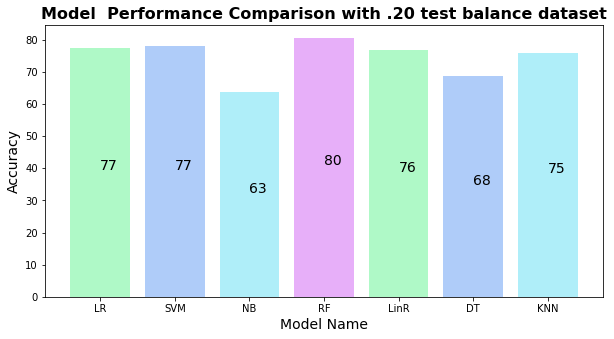

In [181]:
accuracy1 = [lr20_accuracy, s20_accuracy,n20_accuracy,rfcl20_accuracy,lin20_accuracy,dt20_accuracy,knn20_accuracy]
model_names = ['LR', 'SVM','NB','RF','LinR','DT','KNN']

total_bar = np.arange(len(model_names))
color = ['#95f7b5', '#95bcf7', '#95e9f7','#df95f7']

fig, ax = plt.subplots(figsize=(10, 5))
bar = plt.bar(model_names, accuracy1, align='center', alpha=.75, color=color)

plt.ylabel('Accuracy',fontsize=14, color='black')
plt.xlabel('Model Name',fontsize=14, color='black')
plt.title('Model  Performance Comparison with .20 test balance dataset', fontsize=16, color='black', fontweight='bold')

# # this functions will set data lebel 
def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()

# split .25 

In [182]:
x3train,x3test,y3train,y3test = train_test_split(x_stand,y,test_size=.25,random_state=1)

# linear regression

In [183]:
regr.fit(x3train,y3train)

LinearRegression()

In [184]:
predict = regr.predict(x3test)
accuracy_score(y3test,predict.round())

0.7760416666666666

In [185]:
accuracy = accuracy_score(y3test,predict.round())
lin25_accuracy = accuracy*100
lin25_accuracy

77.60416666666666

In [186]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y3test,predict.round())
conf_mat

array([[108,  15],
       [ 28,  41]], dtype=int64)

In [187]:
print(classification_report(y3test,predict.round()))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       123
           1       0.73      0.59      0.66        69

    accuracy                           0.78       192
   macro avg       0.76      0.74      0.74       192
weighted avg       0.77      0.78      0.77       192



# logistic regression

In [188]:
l_reg.fit(x3train,y3train)

LogisticRegression()

In [189]:
predict = l_reg.predict(x3test)
accuracy_score(y3test,predict.round())

0.78125

In [190]:
accuracy = accuracy_score(y3test,predict.round())
lr25_accuracy = accuracy*100
lr25_accuracy

78.125

In [191]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y3test,predict.round())
conf_mat

array([[108,  15],
       [ 27,  42]], dtype=int64)

In [192]:
print(classification_report(y3test,predict.round()))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       123
           1       0.74      0.61      0.67        69

    accuracy                           0.78       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.78      0.78      0.78       192



# svm

In [193]:
model.fit(x3train,y3train)

SVC()

In [194]:
predict = model.predict(x3test)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [195]:
model.score(x3test,y3test)

0.7864583333333334

In [196]:
model_accuracy = accuracy_score(y3test,predict)
s25_accuracy = model_accuracy*100
s25_accuracy

78.64583333333334

In [197]:
conf_mat = confusion_matrix(y3test,predict)
conf_mat

array([[113,  10],
       [ 31,  38]], dtype=int64)

In [198]:
print(classification_report(y3test,predict))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       123
           1       0.79      0.55      0.65        69

    accuracy                           0.79       192
   macro avg       0.79      0.73      0.75       192
weighted avg       0.79      0.79      0.78       192



# naive_bayes

In [199]:
x3train,x3test,y3train,y3test = train_test_split(x,y,test_size = .25,random_state = 1)
reg.fit(x3train,y3train)

MultinomialNB()

In [200]:
predict = reg.predict(x3test)
predict

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [201]:
accuracy = accuracy_score(y3test,predict)
n25_accuracy  = accuracy*100
n25_accuracy

69.27083333333334

In [202]:
reg_conf = confusion_matrix(y3test,predict)
reg_conf

array([[100,  23],
       [ 36,  33]], dtype=int64)

In [203]:
print(classification_report(y3test,predict))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       123
           1       0.59      0.48      0.53        69

    accuracy                           0.69       192
   macro avg       0.66      0.65      0.65       192
weighted avg       0.68      0.69      0.68       192



# random forest

In [204]:
x1train,x1test,y1train,y1test = train_test_split(x_stand,y,test_size = .25,random_state = 1)
Rclf.fit(x3train,y3train)

RandomForestClassifier()

In [205]:
Rclf.score(x3test,y3test)

0.7916666666666666

In [206]:
predict = Rclf.predict(x3test)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [207]:
accuracy = accuracy_score(y3test,predict)

In [208]:
rfcl25_accuracy  = accuracy*100
rfcl25_accuracy

79.16666666666666

In [209]:
reg_conf = confusion_matrix(y3test,predict)
reg_conf

array([[109,  14],
       [ 26,  43]], dtype=int64)

In [210]:
print(classification_report(y3test,predict))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       123
           1       0.75      0.62      0.68        69

    accuracy                           0.79       192
   macro avg       0.78      0.75      0.76       192
weighted avg       0.79      0.79      0.79       192



# decession tree

In [211]:
dt.fit(x3train,y3train)

DecisionTreeClassifier()

In [212]:
predict = dt.predict(x3test)
predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [213]:
dt.score(x3test,y3test)

0.7083333333333334

In [214]:
accuracy = accuracy_score(y3test,predict)
dt25_accuracy = accuracy*100
dt25_accuracy

70.83333333333334

In [215]:
conf_mat = confusion_matrix(y3test,predict)
conf_mat

array([[97, 26],
       [30, 39]], dtype=int64)

# KNN

In [216]:
knn_classifier.fit(x3train,y3train)
knn_classifier.score(x3test,y3test)

0.75

In [217]:
predict = knn_classifier.predict(x3test)
predict

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [218]:
accuracy = accuracy_score(y3test,predict)
knn25_accuracy = accuracy*100
knn25_accuracy

75.0

In [219]:
conf_mat = confusion_matrix(y3test,predict)
conf_mat

array([[101,  22],
       [ 26,  43]], dtype=int64)

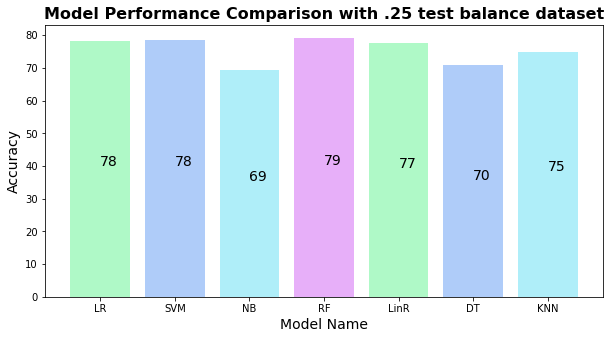

In [220]:
accuracy1 = [lr25_accuracy, s25_accuracy,n25_accuracy,rfcl25_accuracy,lin25_accuracy,dt25_accuracy,knn25_accuracy]
model_names = ['LR', 'SVM','NB','RF','LinR','DT','KNN']

total_bar = np.arange(len(model_names))
color = ['#95f7b5', '#95bcf7', '#95e9f7','#df95f7']

fig, ax = plt.subplots(figsize=(10, 5))
bar = plt.bar(model_names, accuracy1, align='center', alpha=.75, color=color)

plt.ylabel('Accuracy',fontsize=14, color='black')
plt.xlabel('Model Name',fontsize=14, color='black')
plt.title('Model Performance Comparison with .25 test balance dataset', fontsize=16, color='black', fontweight='bold')

# # this functions will set data lebel 
def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()